## Scatter Plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_tm_vs_identity(tsv_path, protein_name, output_path="tm_vs_identity.png"):
    df = pd.read_csv(tsv_path, sep="\t")

    df = df[(df["alntmscore"] <= 1.0) & (df["global_seq_identity"] <= 1.0)]
    plt.figure(figsize=(6, 6))
    plt.scatter(df["global_seq_identity"], df["alntmscore"], alpha=0.8, edgecolors="k")

    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.ylabel("TM-align Score", fontsize=12)
    plt.xlabel("Global Sequence Identity", fontsize=12)
    plt.title(f"TM-align Score vs. Sequence Identity for {protein_name}", fontsize=14)
    # plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(output_path, dpi=300)
    plt.show()   

## Protein Visualization

In [ ]:
import os
import glob
import pymol2

def align_query_to_canonical(query_id, canonical_dir, query_dir, out_dir):
    os.makedirs(out_dir, exist_ok=True)

    canonical_pdb = glob.glob(os.path.join(canonical_dir, "*.pdb"))[0]
    canonical_name = "canonical"

    query_pdb = os.path.join(query_dir, f"{query_id}.pdb")

    with pymol2.PyMOL() as pymol:
        pymol.cmd.load(canonical_pdb, canonical_name)
        pymol.cmd.load(query_pdb, query_id)

        pymol.cmd.align(query_id, canonical_name)

        canonical_out = os.path.join(out_dir, f"{query_id}_canonical_aligned.pdb")
        query_out = os.path.join(out_dir, f"{query_id}_aligned.pdb")
        pymol.cmd.save(canonical_out, canonical_name)
        pymol.cmd.save(query_out, query_id)

        print(f"Saved aligned PDBs for {query_id} to {out_dir}/")

## Parameter Search Heat Map

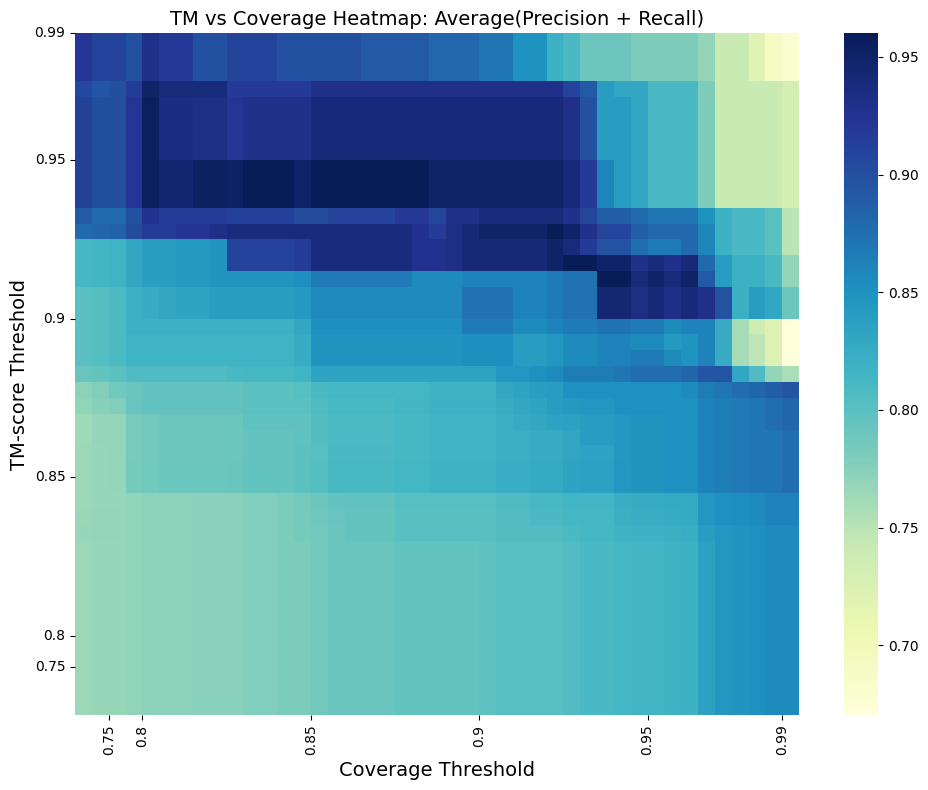

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

df = pd.read_csv("sqr/sqr_combined_100_new/coverage_filtered_csv/precision_recall_summary.csv")

def extract_tm_cov(filename):
    tm_match = re.search(r'tm_([0-9]+(?:\.[0-9]+)?)', filename)
    cov_match = re.search(r'cov_([0-9]+(?:\.[0-9]+)?)', filename)
    tm = float(tm_match.group(1)) if tm_match else None
    cov = float(cov_match.group(1)) if cov_match else None
    return pd.Series([tm, cov])

df[['tm', 'cov']] = df['filename'].apply(extract_tm_cov)

for col in ["precision", "recall"]:
    df[col] = df[col].astype(float)

df["score_avg"] = df[["precision", "recall"]].sum(axis=1)/2

heatmap_data = df.pivot_table(index="tm", columns="cov", values="score_avg")

heatmap_data = heatmap_data.sort_index(ascending=False)
heatmap_data = heatmap_data.sort_index(axis=1, ascending=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    # annot=True,
    fmt=".2f",
    cmap="YlGnBu",
)
plt.title("TM vs Coverage Heatmap: Average(Precision + Recall)", fontsize = 14)
plt.xlabel("Coverage Threshold", fontsize = 14)
plt.ylabel("TM-score Threshold", fontsize = 14)
desired_ticks = [0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
plt.yticks(ticks=[heatmap_data.index.get_loc(x) for x in desired_ticks if x in heatmap_data.index],
           labels=desired_ticks)

plt.xticks(ticks=[heatmap_data.columns.get_loc(x) for x in desired_ticks if x in heatmap_data.columns],
           labels=desired_ticks)

plt.tight_layout()
plt.savefig("figs/pr_combined_100.png", dpi = 1000)
plt.show()

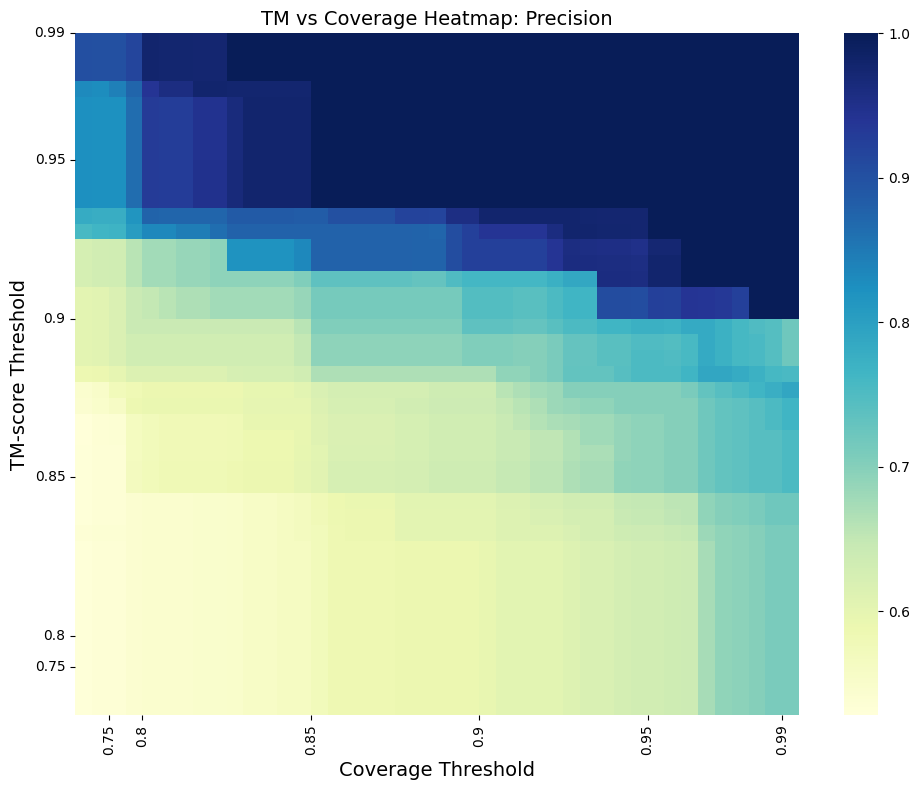

In [ ]:
heatmap_data = df.pivot_table(index="tm", columns="cov", values="precision")

heatmap_data = heatmap_data.sort_index(ascending=False)
heatmap_data = heatmap_data.sort_index(axis=1, ascending=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    # annot=True,
    fmt=".2f",
    cmap="YlGnBu",
)
plt.title("TM vs Coverage Heatmap: Precision", fontsize = 14)
plt.xlabel("Coverage Threshold", fontsize = 14)
plt.ylabel("TM-score Threshold", fontsize = 14)
desired_ticks = [0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
plt.yticks(ticks=[heatmap_data.index.get_loc(x) for x in desired_ticks if x in heatmap_data.index],
           labels=desired_ticks)

plt.xticks(ticks=[heatmap_data.columns.get_loc(x) for x in desired_ticks if x in heatmap_data.columns],
           labels=desired_ticks)
plt.tight_layout()
plt.savefig("figs/p_combined_100.png", dpi = 1000)
plt.show()

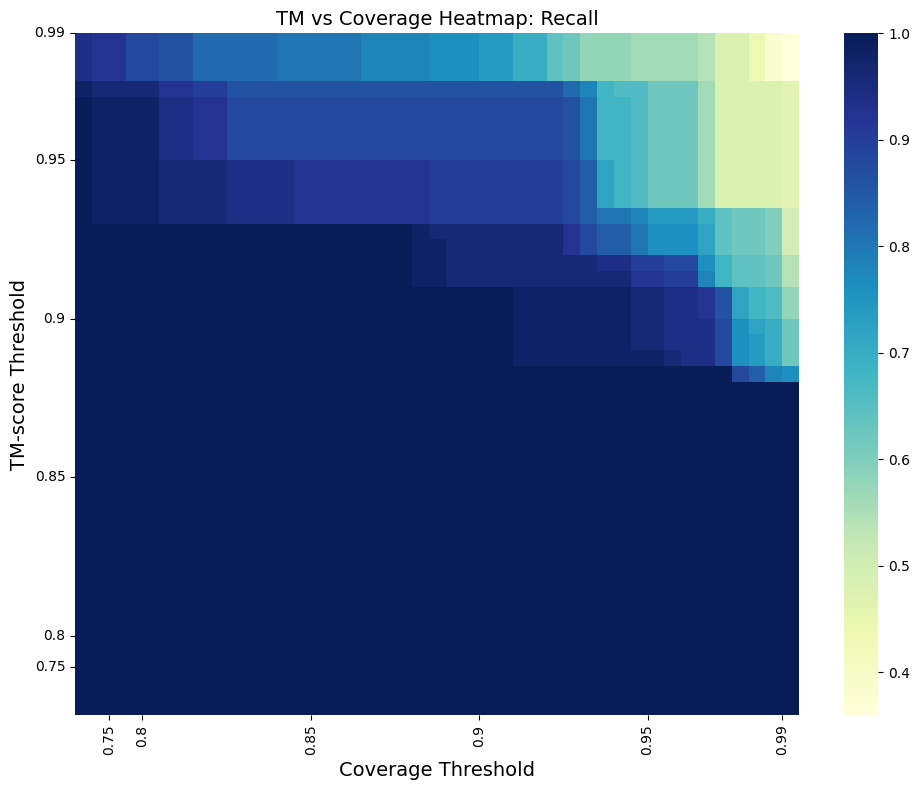

In [ ]:
heatmap_data = df.pivot_table(index="tm", columns="cov", values="recall")

heatmap_data = heatmap_data.sort_index(ascending=False)
heatmap_data = heatmap_data.sort_index(axis=1, ascending=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    # annot=True,
    fmt=".2f",
    cmap="YlGnBu",
)
plt.title("TM vs Coverage Heatmap: Recall", fontsize = 14)
plt.xlabel("Coverage Threshold", fontsize = 14)
plt.ylabel("TM-score Threshold", fontsize = 14)
desired_ticks = [0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
plt.yticks(ticks=[heatmap_data.index.get_loc(x) for x in desired_ticks if x in heatmap_data.index],
           labels=desired_ticks)

plt.xticks(ticks=[heatmap_data.columns.get_loc(x) for x in desired_ticks if x in heatmap_data.columns],
           labels=desired_ticks)
plt.tight_layout()
plt.savefig("figs/r_combined_100.png", dpi = 1000)
plt.show()